In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def simteg(dicesAttacker, dicesDefendant, N=1000000):
    a = np.random.randint(1,7,[dicesAttacker,N])
    d = np.random.randint(1,7,[dicesDefendant,N])
    
    a_sorted = np.sort(a, axis=0)[-dicesDefendant:]
    d_sorted = np.sort(d, axis=0)[-dicesAttacker:]
    
    wins = np.all(a_sorted > d_sorted, axis=0).sum()
    return wins/N

# 3vs3

In [3]:
rolls = []
for A1 in range(1,7):
    for A2 in range(1,7):
        for A3 in range(1,7):
            for D1 in range(1,7):
                for D2 in range(1,7):
                    for D3 in range(1,7):
                        if A1 > A2 and A2 > A3 and D1 > D2 and D2 > D3:
                            rolls.append([A1, A2, A3, D1, D2, D3])
rolls = np.array(rolls)

In [4]:
def count3v3(rolls):
    rolls = np.asarray(rolls)
    A1, A2, A3, D1, D2, D3 = rolls.T
    G3 = np.sum((A1 > D1) & (A2 > D2) & (A3 > D3))
    G2 = np.sum(
        (A1 <= D1) & (A2 > D2) & (A3 > D3) |
        (A1 > D1) & (A2 <= D2) & (A3 > D3) |
        (A1 > D1) & (A2 > D2) & (A3 <= D3)
    )
    G1 = np.sum(
        (A1 <= D1) & (A2 <= D2) & (A3 > D3) |
        (A1 <= D1) & (A2 > D2) & (A3 <= D3) |
        (A1 > D1) & (A2 <= D2) & (A3 <= D3)
    )
    G0 = np.sum((A1 <= D1) & (A2 <= D2) & (A3 <= D3))
    return np.array([G3, G2, G1, G0])

count3v3(rolls)


array([ 50,  77,  98, 175])

In [5]:
cases_3v3 = {
    "Y1 = Y2 = Y3, Z1 = Z2 = Z3": [],
    "Y1 = Y2 > Y3, Z1 = Z2 = Z3": [],
    "Y1 > Y2 = Y3, Z1 = Z2 = Z3": [],
    "Y1 > Y2 > Y3, Z1 = Z2 = Z3": [],
    "Y1 = Y2 = Y3, Z1 = Z2 > Z3": [],
    "Y1 = Y2 = Y3, Z1 > Z2 = Z3": [],
    "Y1 = Y2 = Y3, Z1 > Z2 > Z3": [],
    "Y1 = Y2 > Y3, Z1 = Z2 > Z3": [],
    "Y1 = Y2 > Y3, Z1 > Z2 = Z3": [],
    "Y1 = Y2 > Y3, Z1 > Z2 > Z3": [],
    "Y1 > Y2 = Y3, Z1 = Z2 > Z3": [],
    "Y1 > Y2 = Y3, Z1 > Z2 = Z3": [],
    "Y1 > Y2 = Y3, Z1 > Z2 > Z3": [],
    "Y1 > Y2 > Y3, Z1 = Z2 > Z3": [],
    "Y1 > Y2 > Y3, Z1 > Z2 = Z3": [],
    "Y1 > Y2 > Y3, Z1 > Z2 > Z3": []
}

for Y1 in range(1, 7):
    for Y2 in range(1, 7):
        for Y3 in range(1, 7):
            for Z1 in range(1, 7):
                for Z2 in range(1, 7):
                    for Z3 in range(1, 7):

                        if (Y1 == Y2 == Y3) and (Z1 == Z2 == Z3):
                            cases_3v3["Y1 = Y2 = Y3, Z1 = Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 > Y3) and (Z1 == Z2 == Z3):
                            cases_3v3["Y1 = Y2 > Y3, Z1 = Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 == Y3) and (Z1 == Z2 == Z3):
                            cases_3v3["Y1 > Y2 = Y3, Z1 = Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 > Y3) and (Z1 == Z2 == Z3):
                            cases_3v3["Y1 > Y2 > Y3, Z1 = Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 == Y3) and (Z1 == Z2 > Z3):
                            cases_3v3["Y1 = Y2 = Y3, Z1 = Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 == Y3) and (Z1 > Z2 == Z3):
                            cases_3v3["Y1 = Y2 = Y3, Z1 > Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 == Y3) and (Z1 > Z2 > Z3):
                            cases_3v3["Y1 = Y2 = Y3, Z1 > Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 > Y3) and (Z1 == Z2 > Z3):
                            cases_3v3["Y1 = Y2 > Y3, Z1 = Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 > Y3) and (Z1 > Z2 == Z3):
                            cases_3v3["Y1 = Y2 > Y3, Z1 > Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 > Y3) and (Z1 > Z2 > Z3):
                            cases_3v3["Y1 = Y2 > Y3, Z1 > Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 == Y3) and (Z1 == Z2 > Z3):
                            cases_3v3["Y1 > Y2 = Y3, Z1 = Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 == Y3) and (Z1 > Z2 == Z3):
                            cases_3v3["Y1 > Y2 = Y3, Z1 > Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 == Y3) and (Z1 > Z2 > Z3):
                            cases_3v3["Y1 > Y2 = Y3, Z1 > Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 > Y3) and (Z1 == Z2 > Z3):
                            cases_3v3["Y1 > Y2 > Y3, Z1 = Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 > Y3) and (Z1 > Z2 == Z3):
                            cases_3v3["Y1 > Y2 > Y3, Z1 > Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 > Y3) and (Z1 > Z2 > Z3):
                            cases_3v3["Y1 > Y2 > Y3, Z1 > Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])



In [6]:
cases_prob_3v3 = {
    "Y1 = Y2 = Y3, Z1 = Z2 = Z3": 1/6**3 * 1/6**3,
    "Y1 = Y2 > Y3, Z1 = Z2 = Z3": 3/6**3 * 1/6**3,
    "Y1 > Y2 = Y3, Z1 = Z2 = Z3": 3/6**3 * 1/6**3,
    "Y1 > Y2 > Y3, Z1 = Z2 = Z3": 6/6**3 * 1/6**3,
    "Y1 = Y2 = Y3, Z1 = Z2 > Z3": 1/6**3 * 3/6**3,
    "Y1 = Y2 = Y3, Z1 > Z2 = Z3": 1/6**3 * 3/6**3,
    "Y1 = Y2 = Y3, Z1 > Z2 > Z3": 1/6**3 * 6/6**3,
    "Y1 = Y2 > Y3, Z1 = Z2 > Z3": 3/6**3 * 3/6**3,
    "Y1 = Y2 > Y3, Z1 > Z2 = Z3": 3/6**3 * 3/6**3,
    "Y1 = Y2 > Y3, Z1 > Z2 > Z3": 3/6**3 * 6/6**3,
    "Y1 > Y2 = Y3, Z1 = Z2 > Z3": 3/6**3 * 3/6**3,
    "Y1 > Y2 = Y3, Z1 > Z2 = Z3": 3/6**3 * 3/6**3,
    "Y1 > Y2 = Y3, Z1 > Z2 > Z3": 3/6**3 * 6/6**3,
    "Y1 > Y2 > Y3, Z1 = Z2 > Z3": 6/6**3 * 3/6**3,
    "Y1 > Y2 > Y3, Z1 > Z2 = Z3": 6/6**3 * 3/6**3,
    "Y1 > Y2 > Y3, Z1 > Z2 > Z3": 6/6**3 * 6/6**3
}

p3v3 = 0
for case, values in cases_3v3.items():
    p3v3 += count3v3(values) * cases_prob_3v3[case]
p3v3

array([0.13760288, 0.21469907, 0.26466049, 0.38303755])

# 2vs3

In [7]:
cases_2v3 = {
    "Y1 = Y2, Z1 = Z2 = Z3": [],
    "Y1 > Y2, Z1 = Z2 = Z3": [],
    "Y1 = Y2, Z1 = Z2 > Z3": [],
    "Y1 = Y2, Z1 > Z2 = Z3": [],
    "Y1 = Y2, Z1 > Z2 > Z3": [],
    "Y1 > Y2, Z1 = Z2 > Z3": [],
    "Y1 > Y2, Z1 > Z2 = Z3": [],
    "Y1 > Y2, Z1 > Z2 > Z3": []
}

for Y1 in range(1, 7):
    for Y2 in range(1, 7):
        for Z1 in range(1, 7):
            for Z2 in range(1, 7):
                for Z3 in range(1, 7):
                    if (Y1 == Y2) and (Z1 == Z2 == Z3):
                        cases_2v3["Y1 = Y2, Z1 = Z2 = Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 > Y2) and (Z1 == Z2 == Z3):
                        cases_2v3["Y1 > Y2, Z1 = Z2 = Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 == Y2) and (Z1 == Z2 > Z3):
                        cases_2v3["Y1 = Y2, Z1 = Z2 > Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 == Y2) and (Z1 > Z2 == Z3):
                        cases_2v3["Y1 = Y2, Z1 > Z2 = Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 == Y2) and (Z1 > Z2 > Z3):
                        cases_2v3["Y1 = Y2, Z1 > Z2 > Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 > Y2) and (Z1 == Z2 > Z3):
                        cases_2v3["Y1 > Y2, Z1 = Z2 > Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 > Y2) and (Z1 > Z2 == Z3):
                        cases_2v3["Y1 > Y2, Z1 > Z2 = Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 > Y2) and (Z1 > Z2 > Z3):
                        cases_2v3["Y1 > Y2, Z1 > Z2 > Z3"].append([Y1, Y2, Z1, Z2, Z3])

In [8]:
def count2v2(rolls):
    rolls = np.asarray(rolls)
    A1, A2, D1, D2, D3 = rolls.T
    G2 = np.sum((A1 > D1) & (A2 > D2))
    G1 = np.sum(
        (A1 <= D1) & (A2 > D2) |
        (A1 > D1) & (A2 <= D2)
    )
    G0 = np.sum((A1 <= D1) & (A2 <= D2))
    return np.array([G2, G1, G0])

In [9]:
cases_prob_2v3 = {
    "Y1 = Y2, Z1 = Z2 = Z3": 1/6**2 * 1/6**3,
    "Y1 > Y2, Z1 = Z2 = Z3": 2/6**2 * 1/6**3,
    "Y1 = Y2, Z1 = Z2 > Z3": 1/6**2 * 3/6**3,
    "Y1 = Y2, Z1 > Z2 = Z3": 1/6**2 * 3/6**3,
    "Y1 = Y2, Z1 > Z2 > Z3": 1/6**2 * 6/6**3,
    "Y1 > Y2, Z1 = Z2 > Z3": 2/6**2 * 3/6**3,
    "Y1 > Y2, Z1 > Z2 = Z3": 2/6**2 * 3/6**3,
    "Y1 > Y2, Z1 > Z2 > Z3": 2/6**2 * 6/6**3
}

p2v3 = 0
for case, values in cases_2v3.items():
    p2v3 += count2v2(values) * cases_prob_2v3[case]
p2v3

array([0.12590021, 0.25475823, 0.61934156])

# Markov

In [10]:
global defender_max_armies

In [11]:
def getProbability(armies_attacker, armies_defender, armies_won):
    probabilities = {
        (1, 1, 1): 15/36,        # π111
        (1, 1, 0): 21/36,        # π110
        (1, 2, 1): 55/216,       # π121
        (1, 2, 0): 161/216,      # π120
        (1, 3, 1): 25/144,       # π131 Mio
        (1, 3, 0): 119/144,      # π130 Mio

        (2, 1, 1): 125/216,      # π211
        (2, 1, 0): 91/216,       # π210
        (2, 2, 2): 295/1296,     # π222
        (2, 2, 1): 420/1296,     # π221
        (2, 2, 0): 581/1296,     # π220
        (2, 3, 2): 0.12590021,   # π232
        (2, 3, 1): 0.25475823,   # π231
        (2, 3, 0): 0.61934156,   # π230

        (3, 1, 1): 855/1296,     # π311
        (3, 1, 0): 441/1296,     # π310
        (3, 2, 2): 2890/7776,    # π322
        (3, 2, 1): 2611/7776,    # π321
        (3, 2, 0): 2275/7776,    # π320
        (3, 3, 3): 0.1376028807, # π333
        (3, 3, 2): 0.2146990741, # π332
        (3, 3, 1): 0.2646604938, # π331
        (3, 3, 0): 0.3830375514, # π330
    }
    if armies_attacker > 3:
        armies_attacker = 3
    if armies_defender > defender_max_armies: # Regla de TEG vs RISK
        armies_defender = defender_max_armies
    return probabilities[(armies_attacker, armies_defender, armies_won)]


In [12]:
def getStates(armies_attacker, armies_defender):
    transient_states = []
    absorbing_states = []

    for i in range(1, armies_attacker+1):
        for j in range(1, armies_defender+1):
            transient_states.append((i, j))

    for i in range(1, armies_attacker+1):
        absorbing_states.append((i, 0))
    for j in range(1, armies_defender+1):
        absorbing_states.append((0, j)) 
    
    return transient_states, absorbing_states

In [13]:
def getMatrixEntries(current_state, post_state):
    attacker_dices_current, defender_dices_current = current_state
    attacker_dices_post, defender_dices_post = post_state
    armies_won = defender_dices_current - defender_dices_post
    armies_lost = attacker_dices_current - attacker_dices_post
    if armies_won < 0  or armies_lost < 0 or (armies_lost + armies_won) != min(min(attacker_dices_current, 3), min(defender_dices_current, defender_max_armies)) or (armies_lost + armies_won > 3): # Regla de TEG vs RISK
        return 0
    else:
        return getProbability(attacker_dices_current, defender_dices_current, armies_won)

In [14]:
def getMatrixR(armies_attacker, armies_defender):
    R = np.zeros((armies_attacker * armies_defender, armies_attacker + armies_defender))
    transient_states, absorbing_states = getStates(armies_attacker, armies_defender)

    for i, transient_state in enumerate(transient_states):
        for j, absorbing_state in enumerate(absorbing_states):
            R[i, j] = getMatrixEntries(transient_state, absorbing_state)
    return R

In [15]:
def getMatrixQ(armies_attacker, armies_defender):
    Q = np.zeros((armies_attacker * armies_defender, armies_attacker * armies_defender))
    transient_states, _ = getStates(armies_attacker, armies_defender)

    for i, transient_state_1 in enumerate(transient_states):
        for j, transient_state_2 in enumerate(transient_states):
            Q[i, j] = getMatrixEntries(transient_state_1, transient_state_2)
    return Q

In [16]:
def getMatrixS(Q, R):
    I = np.identity(Q.shape[0])
    return np.matmul(np.linalg.inv(I - Q), R)


In [17]:
def calculateWiningProbability(armies_attacker, armies_defender):
    Q = getMatrixQ(armies_attacker, armies_defender)
    R = getMatrixR(armies_attacker, armies_defender)
    S = getMatrixS(Q, R)
    wining_probability = S[-1:][0][:armies_attacker].sum()
    return wining_probability 

In [18]:
def getMatrixP(armies_attacker, armies_defender):
    P = np.zeros((armies_attacker, armies_defender))
    for A in range(armies_attacker):
        for D in range(armies_defender):
            P[A, D] = calculateWiningProbability(A+1, D+1)
    return P

# Plot

In [19]:
params = {
    'figure.figsize': (11, 6),
    'font.size': 18,
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.linewidth': 0.5,
    'axes.axisbelow': True,
    'legend.fontsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20
}

plt.rcParams.update(params)

In [21]:
armies_attacker = 30
armies_defender = 30

defender_max_armies = 3
P_teg = getMatrixP(armies_attacker, armies_defender) * 100
defender_max_armies = 2
P_risk = getMatrixP(armies_attacker, armies_defender) * 100

#for A in range(armies_attacker):
#    if A % 2 == 0:
#        plt.plot(range(1, armies_defender + 1), P_teg[A, :], label=f'Attacking Armies = {A + 1}')


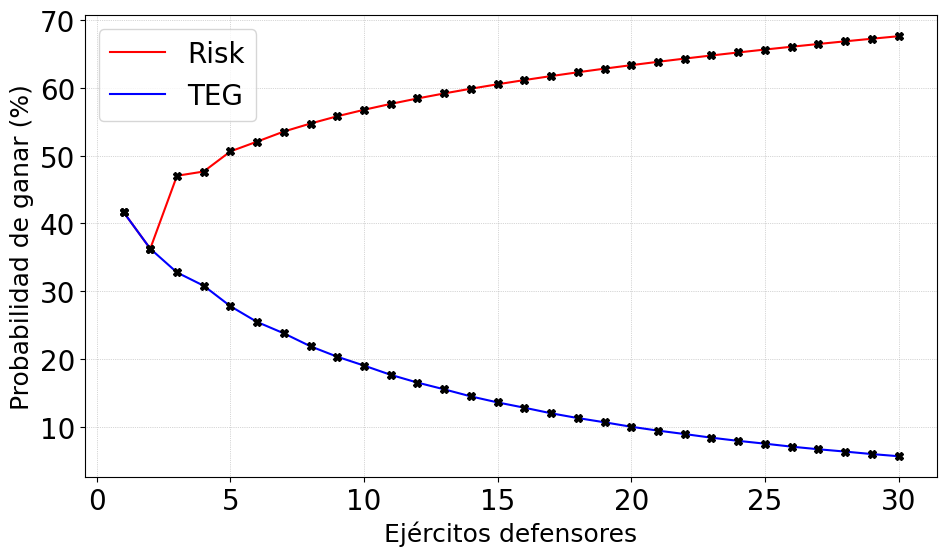

In [22]:
equal_armies_curve = np.diag(P_risk)
plt.plot(range(1, len(equal_armies_curve) + 1), equal_armies_curve, color='red', label='Risk')
plt.plot(range(1, len(equal_armies_curve) + 1), equal_armies_curve, 'X', color='black')
equal_armies_curve = np.diag(P_teg)
plt.plot(range(1, len(equal_armies_curve) + 1), equal_armies_curve, color='blue', label='TEG')
plt.plot(range(1, len(equal_armies_curve) + 1), equal_armies_curve, 'X', color='black')

plt.xlabel('Ejércitos defensores')
plt.ylabel('Probabilidad de ganar (%)')
plt.legend()
plt.show()

In [27]:
defender_max_armies = 3
calculateWiningProbability(30, 30)

0.05652570193837847